# PASSO 1 — Carregamento do dataset final

In [109]:
# Biblioteca para manipulação de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [110]:
# Carregamento do dataset final preparado na etapa de EDA e Feature Engineering
df_modelo = pd.read_csv("obesity_dataset_modelo.csv")

# Visualização das primeiras linhas
df_modelo.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Obesity
0,21.0,1.62,64.0,2,3,2,0,1,24.386526,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,21.0,1.52,56.0,3,3,3,3,0,24.238227,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,23.0,1.80,77.0,2,3,2,2,1,23.765432,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,27.0,1.80,87.0,3,3,2,2,0,26.851852,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4,22.0,1.78,89.8,2,1,2,0,0,28.342381,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6


In [111]:
# Verificação da dimensão do dataset
df_modelo.shape

(2087, 25)

In [112]:
# Separação das variáveis explicativas (X) e da variável alvo (y)
X = df_modelo.drop(columns=["Obesity"])
y = df_modelo["Obesity"]

In [113]:
# Divisão do dataset em conjuntos de treino e teste
# test_size=0.2 -> 80% treino e 20% teste
# random_state garante reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# PASSO 2 — Treinamento de Modelos

In [114]:
# Importação do modelo de Regressão Logística
# Usado como baseline por ser simples, rápido e interpretável
from sklearn.linear_model import LogisticRegression

In [115]:
# Instanciação do modelo de Regressão Logística
# max_iter aumentado para garantir convergência
model_lr = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    solver="lbfgs",
    n_jobs=-1
)

# Treinamento do modelo com os dados de treino
model_lr.fit(X_train, y_train)

c:\Users\mathe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1)

In [116]:
# Geração das previsões no conjunto de teste
y_pred_lr = model_lr.predict(X_test)

In [117]:
# Cálculo da acurácia do modelo
accuracy_lr = accuracy_score(y_test, y_pred_lr)

accuracy_lr

0.8732057416267942

In [118]:
# Relatório detalhado de métricas por classe
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.80      0.79      0.80        57
           2       0.91      0.87      0.89        70
           3       0.92      1.00      0.96        60
           4       0.98      0.98      0.98        65
           5       0.73      0.78      0.75        55
           6       0.80      0.71      0.75        58

    accuracy                           0.87       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.87      0.87      0.87       418



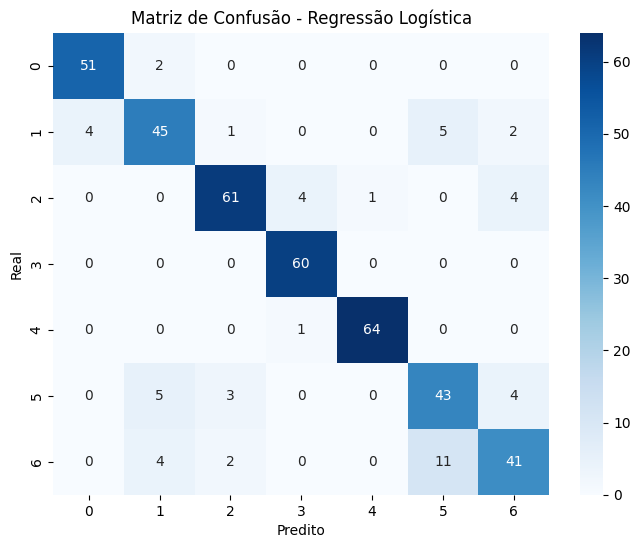

In [119]:
# Criação da matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# PASSO 3 — Modelo Robusto: Random Forest

In [120]:
# Importação do classificador Random Forest
# Modelo baseado em múltiplas árvores de decisão
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# Instanciação do modelo Random Forest
# n_estimators: número de árvores
# random_state: garante reprodutibilidade
# n_jobs=-1: utiliza todos os núcleos da máquina
model_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

# Treinamento do modelo com os dados de treino
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [122]:
# Geração das previsões do Random Forest no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

In [123]:
# Cálculo da acurácia do Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf

0.9808612440191388

In [124]:
# Relatório detalhado de métricas do Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.93      0.98      0.96        57
           2       0.99      1.00      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       0.98      0.95      0.96        55
           6       0.98      0.95      0.96        58

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



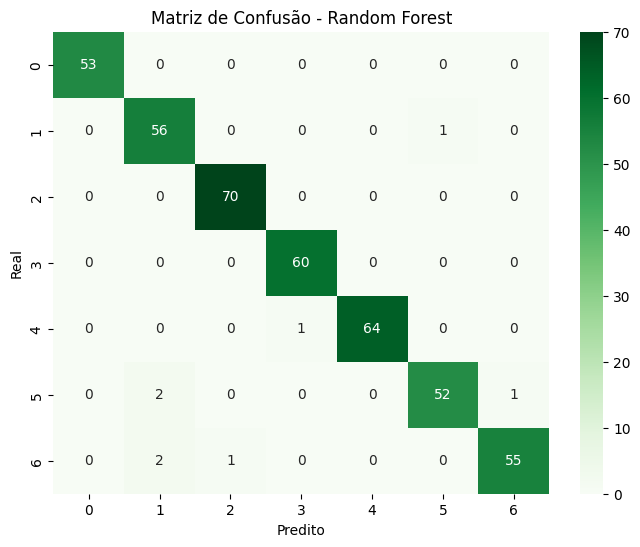

In [125]:
# Criação da matriz de confusão do Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [126]:
# Comparação simples das acurácias dos modelos
pd.DataFrame({
    "Modelo": ["Regressão Logística", "Random Forest"],
    "Acurácia": [accuracy_lr, accuracy_rf]
})

,Modelo,Acurácia
0,Regressão Logística,0.873206
1,Random Forest,0.980861


# PASSO 4: Seleção do modelo final e salvamento

In [127]:
# Acurácia no conjunto de treino
train_accuracy_rf = model_rf.score(X_train, y_train)

# Acurácia no conjunto de teste
test_accuracy_rf = model_rf.score(X_test, y_test)

train_accuracy_rf, test_accuracy_rf

(1.0, 0.9808612440191388)

### Avaliação de Overfitting

Embora o modelo Random Forest tenha apresentado 100% de acurácia no conjunto
de treino, o desempenho no conjunto de teste (≈98%) permaneceu elevado,
indicando boa capacidade de generalização e ausência de overfitting severo.

In [128]:
# Importância das variáveis no Random Forest
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
8,BMI,0.349469
2,Weight,0.217759
0,Age,0.073617
1,Height,0.064773
9,Gender_Male,0.056245
3,FCVC,0.031250
10,family_history_yes,0.026331
4,NCP,0.023494
6,FAF,0.019020
19,CALC_no,0.017544


In [129]:
import joblib

# Salvando o modelo treinado
joblib.dump(model_rf, "random_forest_obesity_model.pkl")

['random_forest_obesity_model.pkl']

In [130]:
# Salvando a ordem das features usadas no modelo
joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [131]:
# Teste rápido de carregamento do modelo
model_loaded = joblib.load("random_forest_obesity_model.pkl")
model_loaded

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

### Modelo Final Selecionado

O modelo Random Forest foi escolhido como modelo final do projeto por apresentar
maior acurácia, melhor desempenho nas classes extremas de obesidade e permitir
interpretação por meio da importância das variáveis.